In [13]:
import duckdb 
import pandas as pd 
import matplotlib.pyplot as plt


In [14]:
con = duckdb.connect("../github_stars.db")


In [15]:
query = """
  select *
  from github_stars.repo_stars_monthly
"""
df_monthly_stars = con.sql(query).df()
df_monthly_stars.to_csv("monthly_stars.csv")

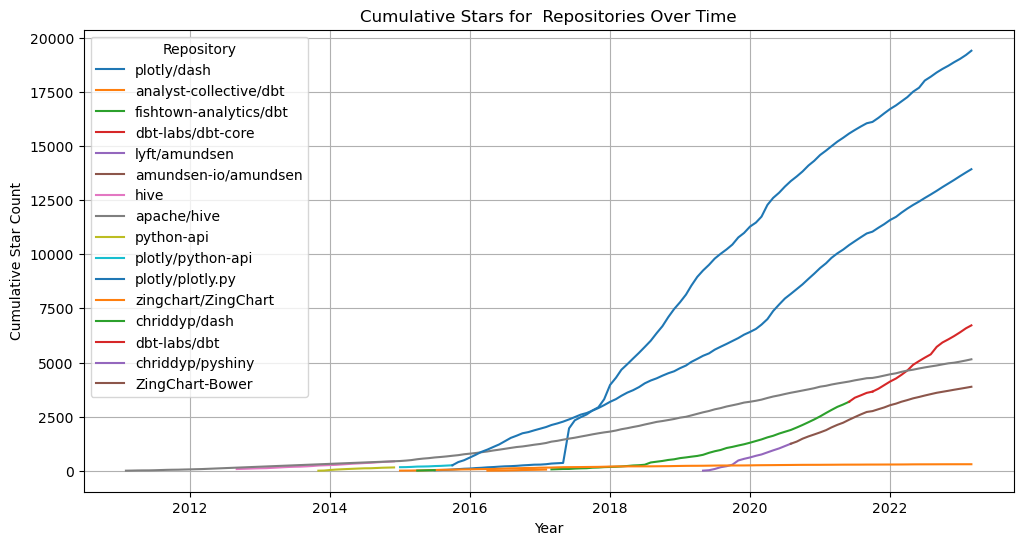

In [16]:
selected_repos = df_monthly_stars['repo_name'].unique()
filtered_data = df_monthly_stars[df_monthly_stars['repo_name'].isin(selected_repos)].sort_values('date_month')


plt.figure(figsize=(12, 6))
for repo in selected_repos:
    repo_data = filtered_data[filtered_data['repo_name'] == repo]
    plt.plot(repo_data['date_month'], repo_data['cumul_star_count'], label=repo)

plt.xlabel('Year')
plt.ylabel('Cumulative Star Count')
plt.title('Cumulative Stars for  Repositories Over Time')
plt.legend(title="Repository", loc='upper left')
plt.grid(True)
plt.show()